In [28]:
import numpy as np
import pandas as pd
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import the dataframe

df= pd.read_csv("./dataset/fake_or_real_news.csv")

df.shape
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [30]:
labels = df.label
Counter(labels)

Counter({'FAKE': 3164, 'REAL': 3171})

In [31]:
x_train,x_test, y_train, y_test = train_test_split(df["text"], labels, test_size=0.2) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(5068,)
(5068,)
(1267,)
(1267,)


In [32]:
tfidf = TfidfVectorizer(stop_words="english",max_df=0.8)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(5068, 61104)
(1267, 61104)


## Passive Aggressive Classifier

In [42]:
PAC=PassiveAggressiveClassifier(max_iter=300)
PAC.fit(x_train,y_train)

PassiveAggressiveClassifier(max_iter=300)

In [43]:
PAC_predict=PAC.predict(x_test)

In [44]:
# Accuracy Score of PAC
Accuracy_PAC = accuracy_score(y_test,PAC_predict)
print("Passive Aggressive :",Accuracy_PAC)

Passive Aggressive : 0.930544593528019


## Decision Tree Classifier

In [45]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
DTC_predict=DTC.predict(x_test)
DTC_predict

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype=object)

In [47]:
Accuracy_DTC = accuracy_score(y_test,DTC_predict)
print("Decision Tree :",Accuracy_DTC)

Decision Tree : 0.8271507498026835


## Logistic Regression

In [48]:
Log = LogisticRegression()
Log.fit(x_train,y_train)

LogisticRegression()

In [49]:
Log_predict=Log.predict(x_test)
Log_predict

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype=object)

In [50]:
Accuracy_Log = accuracy_score(y_test,Log_predict)
print("Logistic Regression :",Accuracy_Log)

Logistic Regression : 0.9108129439621152


## RandomForestTree

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RAN = RandomForestClassifier()
RAN.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
RAN_predict=RAN.predict(x_test)

In [54]:
Accuracy_RAN = accuracy_score(y_test,RAN_predict)
print("Random Forest Tree :",Accuracy_RAN)

Random Forest Tree : 0.9013417521704814


## SVC

In [55]:
from sklearn.svm import SVC

In [56]:
SVC_model = SVC()
SVC_model.fit(x_train,y_train)

SVC()

In [57]:
SVC_model_predict = SVC_model.predict(x_test)

In [58]:
Accuracy_SVC = accuracy_score(y_test,SVC_model_predict)
print("SVC :",Accuracy_SVC)

SVC : 0.9210734017363852


## GaussianNB

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
Gaus = GaussianNB()
Gaus.fit(x_train.toarray(),y_train)

GaussianNB()

In [61]:
Gaus_predict = Gaus.predict(x_test.toarray())

In [62]:
Accuracy_GNB = accuracy_score(y_test,Gaus_predict)
print("GaussianNB : ",Accuracy_GNB)

GaussianNB :  0.7995264404104183


<BarContainer object of 6 artists>

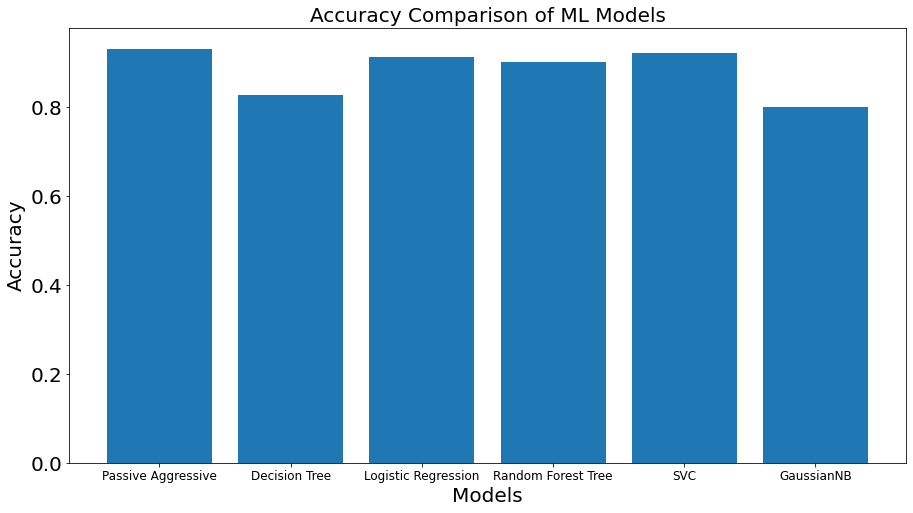

In [67]:
labels = {'Passive Aggressive':Accuracy_PAC, 'Decision Tree':Accuracy_DTC, 'Logistic Regression':Accuracy_Log, 
          'Random Forest Tree':Accuracy_RAN,'SVC':Accuracy_SVC,'GaussianNB':Accuracy_GNB }

plt.figure(figsize=(15,8))
plt.title("Accuracy Comparison of ML Models", fontSize=20)
plt.xticks(fontSize=12)
plt.yticks(fontSize=20)
plt.ylabel("Accuracy",fontSize=20)
plt.xlabel("Models",fontSize=20)
plt.bar(labels.keys(),labels.values())